# threshold=0.01, mutation_count=None, R=100, significance_level=0.01

In [6]:
import pandas as pd

cancer_samples = pd.read_csv('data/signatures_in_sample.csv')[['Sample Names', 'Cancer']]
cancer_samples['Sample Names'] = cancer_samples['Sample Names'].astype(str)


### Ground truth

In [7]:

file = 'output/ground_truth.csv'

ground_truth_df = pd.read_csv(file, index_col=0)
ground_truth_df['Sample Names'] = ground_truth_df['Sample Names'].astype(str)
ground_truth_df = pd.merge(ground_truth_df, cancer_samples, on='Sample Names', how='inner')

ground_truth_df.head()



,findSigExposures,best_columns,Sample Names,Cancer
0,0.104969,0,1199,Stomach-AdenoCA
1,0.387061,4,1199,Stomach-AdenoCA
2,0.102731,20,1199,Stomach-AdenoCA
3,0.181039,21,1199,Stomach-AdenoCA
4,0.224201,22,1199,Stomach-AdenoCA


In [8]:
ground_truth_df['Sample Names'] = ground_truth_df['Sample Names'].astype(str)

### Our truth

In [9]:
experiment_df = pd.read_csv('output/experiment.csv', index_col=0)
experiment_df['Sample Names'] = experiment_df['Sample Names'].astype(str)

In [10]:
experiment_df = pd.merge(experiment_df, cancer_samples, on='Sample Names', how='inner')


In [11]:
experiment_sig_profiler_df = pd.read_csv('output/experiment_sig_profiles.csv', index_col=0)
experiment_sig_profiler_df = pd.merge(experiment_sig_profiler_df, cancer_samples, on='Sample Names', how='inner')

experiment_sig_profiler_df.head()

,findSigExposures,best_columns,Sample Names,Cancer
0,0.1054,0,1199,Stomach-AdenoCA
1,0.3978,4,1199,Stomach-AdenoCA
2,0.0976,20,1199,Stomach-AdenoCA
3,0.1846,21,1199,Stomach-AdenoCA
4,0.2146,22,1199,Stomach-AdenoCA


In [12]:
experiment_signal_df = pd.read_csv('output/experiment_signal.csv', index_col=0)
experiment_signal_df['Sample Names'] = experiment_signal_df['Sample Names'].astype(str)
experiment_signal_df = pd.merge(experiment_signal_df, cancer_samples, on='Sample Names', how='inner')

experiment_signal_df.head()

,findSigExposures,best_columns,Sample Names,Cancer
0,0.142133,0,1199,Stomach-AdenoCA
1,0.270109,4,1199,Stomach-AdenoCA
2,0.123916,20,1199,Stomach-AdenoCA
3,0.242678,21,1199,Stomach-AdenoCA
4,0.221164,22,1199,Stomach-AdenoCA


In [13]:
experiment_dec_sig_df = pd.read_csv('output/experiment_dec.csv', index_col=0)
experiment_dec_sig_df['Sample Names'] = experiment_dec_sig_df['Sample Names'].astype(str)
experiment_dec_sig_df = pd.merge(experiment_dec_sig_df, cancer_samples, on='Sample Names', how='inner')

experiment_dec_sig_df.head()

,findSigExposures,best_columns,Sample Names,Cancer
0,0.117881,0,1199,Stomach-AdenoCA
1,0.115787,4,1199,Stomach-AdenoCA
2,0.013400,13,1199,Stomach-AdenoCA
3,0.034652,19,1199,Stomach-AdenoCA
4,0.097676,20,1199,Stomach-AdenoCA


In [14]:
def calculate_metrics(predicted, actual, total_values):
    predicted_set = set(predicted)
    actual_set = set(actual)
    all_values_set = set(range(total_values))

    true_positives = len(predicted_set.intersection(actual_set))
    true_negatives = len(all_values_set.difference(actual_set).difference(predicted_set))

    false_negatives = actual_set.difference(predicted_set)
    false_positives = predicted_set.difference(actual_set)

    total_positives = len(actual_set)
    total_negatives = total_values - total_positives

    sensitivity = true_positives / total_positives if total_positives else 0
    specificity = true_negatives / total_negatives if total_negatives else 0

    return sensitivity, specificity, false_negatives, false_positives


In [15]:
indexes = ['SBS1', 'SBS2', 'SBS3', 'SBS4', 'SBS5', 'SBS6', 'SBS7a', 'SBS7b',
           'SBS7c', 'SBS7d', 'SBS8', 'SBS9', 'SBS10a', 'SBS10b', 'SBS11', 'SBS12',
           'SBS13', 'SBS14', 'SBS15', 'SBS16', 'SBS17a', 'SBS17b', 'SBS18',
           'SBS19', 'SBS20', 'SBS21', 'SBS22', 'SBS23', 'SBS24', 'SBS25', 'SBS26',
           'SBS27', 'SBS28', 'SBS29', 'SBS30', 'SBS31', 'SBS32', 'SBS33', 'SBS34',
           'SBS35', 'SBS36', 'SBS37', 'SBS38', 'SBS39', 'SBS40', 'SBS41', 'SBS42',
           'SBS43', 'SBS44', 'SBS45', 'SBS46', 'SBS47', 'SBS48', 'SBS49', 'SBS50',
           'SBS51', 'SBS52', 'SBS53', 'SBS54', 'SBS55', 'SBS56', 'SBS57', 'SBS58',
           'SBS59', 'SBS60', 'SBS84', 'SBS85']


mapping = {index: name for index, name in enumerate(indexes)}


In [16]:
import pandas as pd

results = []
total_values = 67

for patient in ground_truth_df['Sample Names'].unique():
    try:
        actualExposures = ground_truth_df.groupby('Sample Names').get_group(patient)['findSigExposures'].tolist()
        predicted = experiment_df.groupby('Sample Names').get_group(patient)['best_columns'].tolist()
        predictedOurExposures = experiment_df.groupby('Sample Names').get_group(patient)['findSigExposures'].tolist()
        predictedSignalExposures = experiment_signal_df.groupby('Sample Names').get_group(patient)['findSigExposures'].tolist()
        predictedSigProfilerExposures = experiment_sig_profiler_df.groupby('Sample Names').get_group(patient)['findSigExposures'].tolist()
        predictedDecSigExposures = experiment_dec_sig_df.groupby('Sample Names').get_group(patient)['findSigExposures'].tolist()

        actual = ground_truth_df.groupby('Sample Names').get_group(patient)['best_columns'].tolist()
        predicted_sig_profile = experiment_sig_profiler_df.groupby('Sample Names').get_group(patient)['best_columns'].tolist()
        predicted_signal = experiment_signal_df.groupby('Sample Names').get_group(patient)['best_columns'].tolist()
        predicted_dec_sig = experiment_dec_sig_df.groupby('Sample Names').get_group(patient)['best_columns'].tolist()

    except:
        print(f'error: patient', patient)
        continue
    sensitivity, specificity, false_negatives, false_positives = calculate_metrics(predicted, actual, total_values)
    sensitivity_sig_profile, specificity_sig_profile, false_negatives_sig_profile, false_positives_sig_profile = calculate_metrics(predicted_sig_profile, actual, total_values)
    sensitivity_signal, specificity_signal, false_negatives_signal, false_positives_signal = calculate_metrics(predicted_signal, actual, total_values)
    sensitivity_dec_sig, specificity_dec_sig, false_negatives_dec_sig, false_positives_dec_sig = calculate_metrics(predicted_dec_sig, actual, total_values)

    results.append({
        'Cancer': ground_truth_df[ground_truth_df['Sample Names'] == patient]['Cancer'].unique()[0],
        'Pacjent': patient,
        'Sensitivity_our': sensitivity,
        'Specificity_our': specificity,
        'Sensitivity_sig_profile':sensitivity_sig_profile,
        'Specificity_sig_profile':specificity_sig_profile,
        'Sensitivity_signal':sensitivity_signal,
        'Specificity_signal':specificity_signal,
        'Sensitivity_dec_sig':sensitivity_dec_sig,
        'Specificity_dec_sig':specificity_dec_sig,
        'actualExposures':  actualExposures,
        'predictedOurExposures':  predictedOurExposures,
        'predictedSignalExposures':  predictedSignalExposures,
        'predictedSigProfilerExposures':  predictedSigProfilerExposures,
        'predictedDecSigExposures':  predictedDecSigExposures,
        'false_negatives_our':  {} if len(false_negatives) == 0 else false_negatives,
        'false_positives_our': {} if len(false_positives) == 0 else false_positives,
        'false_negatives_sig_profile':  {} if len(false_negatives_sig_profile) == 0 else false_negatives_sig_profile,
        'false_positives_sig_profile': {} if len(false_positives_sig_profile) == 0 else false_positives_sig_profile,
        'false_negatives_signal':  {} if len(false_negatives_signal) == 0 else false_negatives_signal,
        'false_positives_signal': {} if len(false_positives_signal) == 0 else false_positives_signal,
        'false_negatives_dec_sig':  {} if len(false_negatives_dec_sig) == 0 else false_negatives_dec_sig,
        'false_positives_dec_sig': {} if len(false_positives_dec_sig) == 0 else false_positives_dec_sig
    })

# Tworzenie DataFrame z wynikami
results_df = pd.DataFrame(results)


error: patient 559
error: patient 0


In [17]:
results_df

,Cancer,Pacjent,Sensitivity_our,Specificity_our,Sensitivity_sig_profile,Specificity_sig_profile,Sensitivity_signal,Specificity_signal,Sensitivity_dec_sig,Specificity_dec_sig,...,predictedSigProfilerExposures,predictedDecSigExposures,false_negatives_our,false_positives_our,false_negatives_sig_profile,false_positives_sig_profile,false_negatives_signal,false_positives_signal,false_negatives_dec_sig,false_positives_dec_sig
0,Stomach-AdenoCA,1199,1.000000,1.0,1.00,1.0,1.000000,1.0,1.0,0.822581,...,"[0.1054, 0.3978, 0.0976, 0.1846, 0.2146]","[0.1178810720268006, 0.115787269681742, 0.0134...",{},{},{},{},{},{},{},"{34, 36, 40, 41, 44, 13, 46, 19, 57, 58, 30}"
1,Stomach-AdenoCA,1198,1.000000,1.0,1.00,1.0,0.428571,1.0,1.0,0.883333,...,"[0.1308, 0.0326, 0.301, 0.022, 0.039, 0.1072, ...","[0.1412782817224481, 0.031070795537483, 0.0577...",{},{},{},{},"{16, 1, 4, 21}",{},{},"{34, 36, 43, 15, 48, 19, 58}"
2,Stomach-AdenoCA,1197,1.000000,1.0,1.00,1.0,1.000000,1.0,1.0,0.903226,...,"[0.0934, 0.3306, 0.0952, 0.1484, 0.3324]","[0.0995561192136969, 0.2111604311984781, 0.019...",{},{},{},{},{},{},{},"{34, 43, 15, 48, 19, 57}"
3,Stomach-AdenoCA,1196,0.800000,1.0,0.60,1.0,0.600000,1.0,1.0,0.983871,...,"[0.1062, 0.4446, 0.4492]","[0.1115202524986848, 0.3426617569700157, 0.018...",{20},{},"{20, 21}",{},"{20, 21}",{},{},{19}
4,Stomach-AdenoCA,1195,1.000000,1.0,1.00,1.0,0.500000,1.0,1.0,0.983607,...,"[0.158, 0.0394, 0.482, 0.019, 0.0384, 0.2632]","[0.1602284527518172, 0.0394600207684319, 0.464...",{},{},{},{},"{1, 20, 21}",{},{},{18}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,Breast,5,0.833333,1.0,1.00,1.0,0.666667,1.0,1.0,0.950820,...,"[0.063, 0.0188, 0.5068, 0.0468, 0.2176, 0.147]","[0.0668783068783068, 0.0194708994708994, 0.428...",{1},{},{},{},"{16, 1}",{},{},"{19, 28, 15}"
1194,Breast,4,1.000000,1.0,0.75,1.0,0.500000,1.0,1.0,0.864407,...,"[0.1346, 0.0544, 0.2972, 0.329, 0.036, 0.1488]","[0.1263666947014297, 0.0415264928511354, 0.157...",{},{},"{34, 38}",{},"{16, 1, 4, 38}",{},{},"{5, 40, 43, 44, 15, 19, 58, 29}"
1195,Breast,3,1.000000,1.0,1.00,1.0,0.400000,1.0,0.6,0.854839,...,"[0.0392, 0.0368, 0.6936, 0.1572, 0.0732]","[0.037157211639104, 0.6259158467657525, 0.0535...",{},{},{},{},"{0, 1, 4}",{},"{0, 4}","{36, 5, 41, 10, 43, 19, 54, 58, 29}"
1196,Breast,2,1.000000,1.0,1.00,1.0,0.750000,1.0,1.0,0.968254,...,"[0.1898, 0.0304, 0.6136, 0.1662]","[0.1899527429628107, 0.0281487569344565, 0.579...",{},{},{},{},{1},{},{},"{5, 62}"


In [18]:
sensitivity_our_mean = results_df.groupby('Cancer')['Sensitivity_our'].mean().reset_index(name='Sensitivity_our_mean')
sensitivity_sig_profile_mean = results_df.groupby('Cancer')['Sensitivity_sig_profile'].mean().reset_index(name='Sensitivity_sig_profile_mean')
sensitivity_signal_mean = results_df.groupby('Cancer')['Sensitivity_signal'].mean().reset_index(name='Sensitivity_signal_mean')
sensitivity_dec_sig_mean = results_df.groupby('Cancer')['Sensitivity_dec_sig'].mean().reset_index(name='Sensitivity_dec_sig_mean')

final_df = sensitivity_our_mean.merge(sensitivity_sig_profile_mean, on='Cancer').merge(sensitivity_signal_mean, on='Cancer').merge(sensitivity_dec_sig_mean, on='Cancer')
final_df

,Cancer,Sensitivity_our_mean,Sensitivity_sig_profile_mean,Sensitivity_signal_mean,Sensitivity_dec_sig_mean
0,Breast,0.971284,0.924531,0.631674,0.961688
1,CNS-GBM,0.970833,1.000000,0.794167,0.983333
2,ColoRect-AdenoCA,0.971167,0.987000,0.838167,0.962000
3,Eso-AdenoCA,0.958071,0.969131,0.709202,0.943083
4,Head-SCC,0.989500,0.983333,0.726833,0.978333
5,Liver-HCC,0.995960,0.983333,0.879293,0.989394
6,Lung-AdenoCA,0.977667,0.992000,0.750000,0.955667
7,Lymph-BNHL,0.957175,0.937127,0.687290,0.975226
8,Ovary-AdenoCA,0.972333,0.969000,0.600167,0.948833
9,Panc-AdenoCA,0.978000,0.965500,0.667833,0.993000


In [19]:
results_df[['Sensitivity_our', 'Sensitivity_sig_profile', 'Sensitivity_signal', 'Sensitivity_dec_sig']].mean()

Sensitivity_our            0.968402
Sensitivity_sig_profile    0.963463
Sensitivity_signal         0.716416
Sensitivity_dec_sig        0.963558
dtype: float64

In [20]:
specificity_our_mean = results_df.groupby('Cancer')['Specificity_our'].mean().reset_index(name='Specificity_our_mean')
specificity_sig_profile_mean = results_df.groupby('Cancer')['Specificity_sig_profile'].mean().reset_index(name='Specificity_sig_profile_mean')
specificity_signal_mean = results_df.groupby('Cancer')['Specificity_signal'].mean().reset_index(name='Specificity_signal_mean')
specificity_dec_sig_mean = results_df.groupby('Cancer')['Specificity_dec_sig'].mean().reset_index(name='Specificity_dec_sig_mean')

final_df = specificity_our_mean.merge(specificity_sig_profile_mean, on='Cancer').merge(specificity_signal_mean, on='Cancer').merge(sensitivity_dec_sig_mean, on='Cancer')
final_df

,Cancer,Specificity_our_mean,Specificity_sig_profile_mean,Specificity_signal_mean,Sensitivity_dec_sig_mean
0,Breast,0.998875,0.999834,1.0,0.961688
1,CNS-GBM,0.998606,0.999385,1.0,0.983333
2,ColoRect-AdenoCA,0.999841,0.999524,1.0,0.962000
3,Eso-AdenoCA,0.998543,0.999524,1.0,0.943083
4,Head-SCC,0.999839,0.999526,1.0,0.978333
5,Liver-HCC,0.999529,0.993536,1.0,0.989394
6,Lung-AdenoCA,0.998730,0.995602,1.0,0.955667
7,Lymph-BNHL,0.998545,0.999685,1.0,0.975226
8,Ovary-AdenoCA,0.999362,0.999052,1.0,0.948833
9,Panc-AdenoCA,0.999206,0.999839,1.0,0.993000


In [21]:
results_df[['Specificity_our', 'Specificity_sig_profile', 'Specificity_signal', 'Specificity_dec_sig']].mean()

Specificity_our            0.998533
Specificity_sig_profile    0.998369
Specificity_signal         1.000000
Specificity_dec_sig        0.928960
dtype: float64

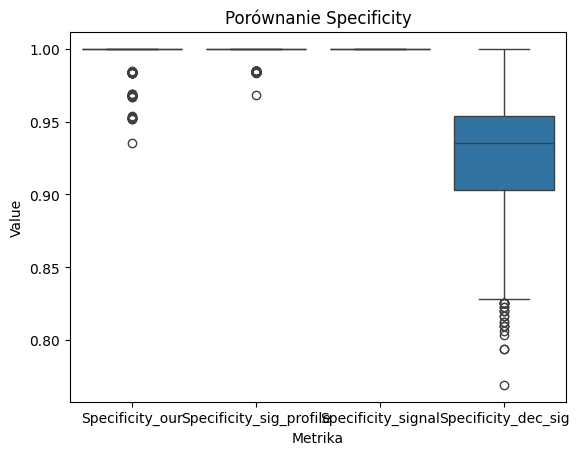

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Przekształcenie DataFrame
melted_df = results_df.melt(value_vars=['Specificity_our', 'Specificity_sig_profile', 'Specificity_signal', 'Specificity_dec_sig'], var_name='Metric', value_name='Value')

# Tworzenie wykresu violin plot
sns.boxplot(x='Metric', y='Value', data=melted_df)

# Dodanie tytułu i etykiet
plt.title('Porównanie Specificity')
plt.xlabel('Metrika')
plt.ylabel('Value')

# Wyświetlenie wykresu
plt.show()

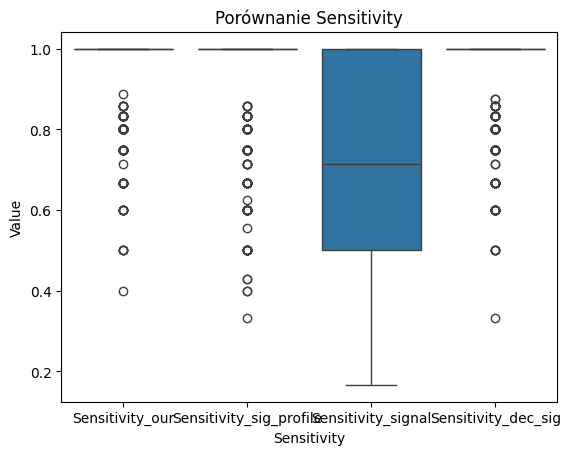

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Przekształcenie DataFrame
melted_df = results_df.melt(value_vars=['Sensitivity_our', 'Sensitivity_sig_profile', 'Sensitivity_signal', 'Sensitivity_dec_sig'], var_name='Metric', value_name='Value')

# Tworzenie wykresu violin plot
sns.boxplot(x='Metric', y='Value', data=melted_df)

# Dodanie tytułu i etykiet
plt.title('Porównanie Sensitivity')
plt.xlabel('Sensitivity')
plt.ylabel('Value')

# Wyświetlenie wykresu
plt.show()


In [24]:
import pandas as pd

signatures_false_negatives_our, signatures_false_positives_our = [], []
signatures_false_negatives_sig_profile, signatures_false_positives_sig_profile = [], []
signatures_false_negatives_signal, signatures_false_positives_signal = [], []
signatures_false_negatives_dec_sig, signatures_false_positives_dec_sig = [], []

for idx, row in results_df.iterrows():
    for item in row['false_negatives_our']:
        signatures_false_negatives_our.append({'Count': row['Pacjent'], 'Cancer': row['Cancer'], 'signature_false_negatives_our': mapping[item]})
    for item in row['false_positives_our']:
        signatures_false_positives_our.append({'Count': row['Pacjent'], 'Cancer': row['Cancer'], 'signature_false_positives_our': mapping[item]})
    
    for item in row['false_negatives_sig_profile']:
        signatures_false_negatives_sig_profile.append({'Count': row['Pacjent'], 'Cancer': row['Cancer'], 'signature_false_negatives_sig_profile': mapping[item]})
    for item in row['false_positives_sig_profile']:
        signatures_false_positives_sig_profile.append({'Count': row['Pacjent'],  'Cancer': row['Cancer'], 'signature_false_positives_sig_profile': mapping[item]})

    for item in row['false_negatives_signal']:
        signatures_false_negatives_signal.append({'Count': row['Pacjent'], 'Cancer': row['Cancer'], 'signature_false_negatives_signal': mapping[item]})
    for item in row['false_positives_signal']:
        signatures_false_positives_signal.append({'Count': row['Pacjent'], 'Cancer': row['Cancer'], 'signature_false_positives_signal': mapping[item]})

    for item in row['false_negatives_dec_sig']:
        signatures_false_negatives_dec_sig.append({'Count': row['Pacjent'], 'Cancer': row['Cancer'], 'signature_false_negatives_dec_sig': mapping[item]})
    for item in row['false_positives_dec_sig']:
        signatures_false_positives_dec_sig.append({'Count': row['Pacjent'], 'Cancer': row['Cancer'], 'signature_false_positives_dec_sig': mapping[item]})



In [29]:

# Teraz możesz wykonać grupowanie na podstawie elementów
grouped_fn_our = pd.DataFrame(signatures_false_negatives_our).groupby(['signature_false_negatives_our', 'Cancer']).count().reset_index()
grouped_fp_our = pd.DataFrame(signatures_false_positives_our).groupby(['signature_false_positives_our', 'Cancer']).count().reset_index()

grouped_fn_sig_profile = pd.DataFrame(signatures_false_negatives_sig_profile).groupby(['signature_false_negatives_sig_profile', 'Cancer']).count().reset_index()
grouped_fp_sig_profile = pd.DataFrame(signatures_false_positives_sig_profile).groupby(['signature_false_positives_sig_profile', 'Cancer']).count().reset_index()


grouped_fn_dec_sig = pd.DataFrame(signatures_false_negatives_dec_sig).groupby('signature_false_negatives_dec_sig').count().reset_index()
grouped_fp_dec_sig = pd.DataFrame(signatures_false_positives_dec_sig).groupby('signature_false_positives_dec_sig').count().reset_index()

grouped_fn_signal = pd.DataFrame(signatures_false_negatives_signal).groupby('signature_false_negatives_signal').count().reset_index()
#grouped_fp_signal = pd.DataFrame(signatures_false_positives_signal).groupby('signature_false_positives_signal').count().reset_index()

In [30]:
grouped_fn_our

,signature_false_negatives_our,Cancer,Count
0,SBS1,Eso-AdenoCA,1
1,SBS1,Lung-AdenoCA,1
2,SBS1,Lymph-BNHL,1
3,SBS13,Breast,4
4,SBS13,Lung-AdenoCA,1
5,SBS13,Ovary-AdenoCA,2
6,SBS13,Panc-AdenoCA,1
7,SBS13,Stomach-AdenoCA,1
8,SBS17a,Eso-AdenoCA,3
9,SBS17a,Lymph-BNHL,1


In [100]:
grouped_fn_sig_profile

,signature_false_negatives_sig_profile,Cancer,Count
0,SBS13,Breast,9
1,SBS13,Eso-AdenoCA,5
2,SBS13,Lung-AdenoCA,1
3,SBS13,Lymph-BNHL,3
4,SBS13,Ovary-AdenoCA,3
...,...,...,...
63,SBS6,Lymph-BNHL,6
64,SBS7c,Skin-Melanoma,17
65,SBS7d,Skin-Melanoma,15
66,SBS8,Ovary-AdenoCA,1


In [103]:
grouped_fn_our['Count'].sum(), grouped_fn_sig_profile['Count'].sum(), 0
#sygnatura była istotna, a nie jest wykryta

(172, 227, 0)

In [102]:
grouped_fp_our['Count'].sum(), grouped_fp_sig_profile['Count'].sum(), 0
#sygnatura nie była istotna, a jest wykryta

(110, 124, 0)

In [31]:
combined_df_fn = pd.merge(grouped_fn_our, grouped_fn_sig_profile, left_on='signature_false_negatives_our', right_on='signature_false_negatives_sig_profile', how='outer').fillna(0)
combined_df_fn = pd.merge(combined_df_fn, grouped_fn_signal, left_on='signature_false_negatives_our', right_on='signature_false_negatives_signal', how='outer').fillna(0)

In [32]:
indexes = ['SBS1', 'SBS2', 'SBS3', 'SBS4', 'SBS5', 'SBS6', 'SBS7a', 'SBS7b',
           'SBS7c', 'SBS7d', 'SBS8', 'SBS9', 'SBS10a', 'SBS10b', 'SBS11', 'SBS12',
           'SBS13', 'SBS14', 'SBS15', 'SBS16', 'SBS17a', 'SBS17b', 'SBS18',
           'SBS19', 'SBS20', 'SBS21', 'SBS22', 'SBS23', 'SBS24', 'SBS25', 'SBS26',
           'SBS27', 'SBS28', 'SBS29', 'SBS30', 'SBS31', 'SBS32', 'SBS33', 'SBS34',
           'SBS35', 'SBS36', 'SBS37', 'SBS38', 'SBS39', 'SBS40', 'SBS41', 'SBS42',
           'SBS43', 'SBS44', 'SBS45', 'SBS46', 'SBS47', 'SBS48', 'SBS49', 'SBS50',
           'SBS51', 'SBS52', 'SBS53', 'SBS54', 'SBS55', 'SBS56', 'SBS57', 'SBS58',
           'SBS59', 'SBS60', 'SBS84', 'SBS85']


mapping = {index: name for index, name in enumerate(indexes)}


In [33]:
grouped_fn_our

,signature_false_negatives_our,Cancer,Count
0,SBS1,Eso-AdenoCA,1
1,SBS1,Lung-AdenoCA,1
2,SBS1,Lymph-BNHL,1
3,SBS13,Breast,4
4,SBS13,Lung-AdenoCA,1
5,SBS13,Ovary-AdenoCA,2
6,SBS13,Panc-AdenoCA,1
7,SBS13,Stomach-AdenoCA,1
8,SBS17a,Eso-AdenoCA,3
9,SBS17a,Lymph-BNHL,1


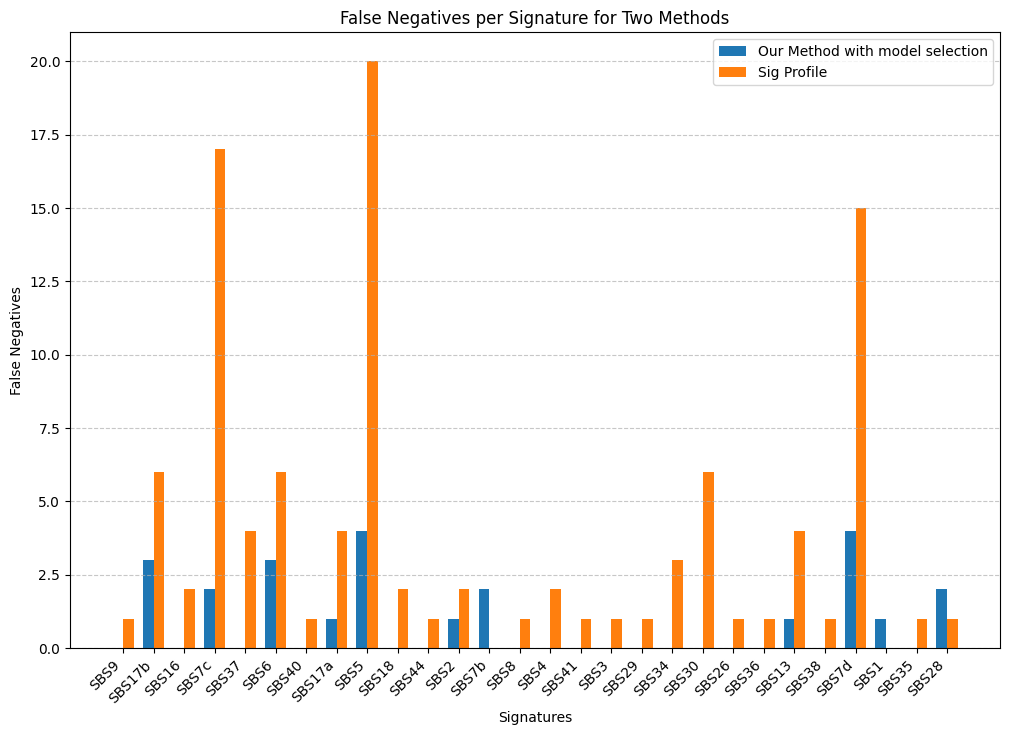

In [34]:

our_signature_counts = dict(zip(grouped_fn_our['signature_false_negatives_our'], grouped_fn_our['Count']))
sig_profile_counts = dict(zip(grouped_fn_sig_profile['signature_false_negatives_sig_profile'], grouped_fn_sig_profile['Count']))

all_signatures = set(grouped_fn_our['signature_false_negatives_our']) | set(grouped_fn_sig_profile['signature_false_negatives_sig_profile'])

our_counts = [our_signature_counts.get(sig, 0) for sig in all_signatures]
sig_profile_counts = [sig_profile_counts.get(sig, 0) for sig in all_signatures]

fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
indexes = np.arange(len(all_signatures))

bar1 = ax.bar(indexes - bar_width/2, our_counts, bar_width, label='Our Method with model selection')
bar3 = ax.bar(indexes + bar_width/2, sig_profile_counts, bar_width, label='Sig Profile')

ax.set_xlabel('Signatures')
ax.set_ylabel('False Negatives')
ax.set_title('False Negatives per Signature for Two Methods')
ax.legend()

plt.xticks(indexes, all_signatures, rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [31]:
import pandas as pd 

df = pd.read_csv('/home/amso/Documents/mutation_signatures/output/WGS-decomposition__PCAWG_sigProfiler_SBS_signatures_in_samples.csv')

In [42]:
#grouped_fp_our['signatures_cat_our'] = grouped_fp_our['signature_false_positives_our'].map(mapping)
#grouped_fp_signal['signatures_cat_signal'] = grouped_fp_signal['signature_false_positives_signal'].map(mapping)
#grouped_fp_sig_profile['signatures_cat_sig_profile'] = grouped_fp_sig_profile['signature_false_positives_sig_profile'].map(mapping)


/tmp/ipykernel_51293/4077827871.py:15: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data = pd.DataFrame({'Value': pd.concat([pd.Series(res_sig_profile), pd.Series(res_our)], ignore_index=True),


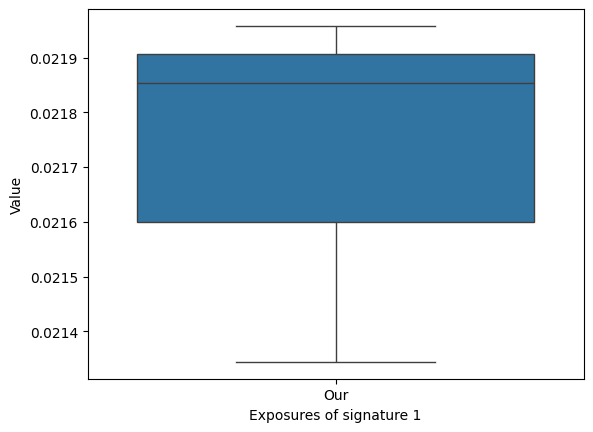

In [32]:
import seaborn as sns 
res_sig_profile = []
for index, row in results_df.iterrows():
    #sygnatura była istotna, a nie jest wykryta
    for sig in row['false_negatives_sig_profile']:
        if sig == 0:
            res_sig_profile.append(row['actualExposures'][0])

res_our = []
for index, row in results_df.iterrows():
    for sig in row['false_negatives_our']:
        if sig == 0:
            res_our.append(row['actualExposures'][0])

data = pd.DataFrame({'Value': pd.concat([pd.Series(res_sig_profile), pd.Series(res_our)], ignore_index=True),
                     'Exposures of signature 1': ['Sig Profile']*len(res_sig_profile) + ['Our']*len(res_our)})

# Rysowanie boxplotów
sns.boxplot(x='Exposures of signature 1', y='Value', data=data)

# Pokazanie wykresu
plt.show()

In [33]:
import seaborn as sns 
res_sig_profile = []
for index, row in results_df.iterrows():
    for sig in row['false_positives_sig_profile']:
        if sig ==0:
            res_sig_profile.append(row['actualExposures'][0])


#data = pd.DataFrame({'Value': pd.concat([pd.Series(res_sig_profile), pd.Series(res_our)], ignore_index=True),
#                     'Type': ['Signature Profile']*len(res_sig_profile) + ['Our Data']*len(res_our)})

# Rysowanie boxplotów

In [34]:
grouped_fp_sig_profile

,signature_false_positives_sig_profile,Cancer,Count
0,SBS1,Breast,1
1,SBS1,CNS-GBM,1
2,SBS1,ColoRect-AdenoCA,3
3,SBS1,Head-SCC,3
4,SBS1,Liver-HCC,41
5,SBS1,Lung-AdenoCA,27
6,SBS1,Lymph-BNHL,1
7,SBS1,Skin-Melanoma,28
8,SBS12,Stomach-AdenoCA,1
9,SBS36,Panc-AdenoCA,1


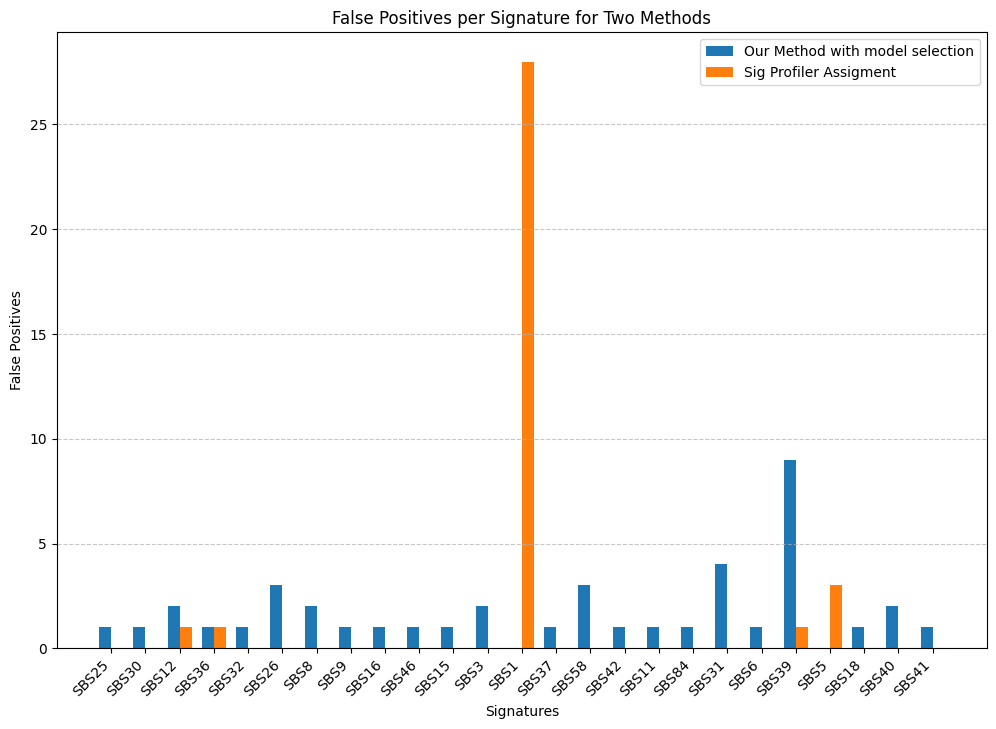

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Tworzenie słowników dla łatwiejszego dostępu do danych
fp_our_dict = dict(zip(grouped_fp_our['signature_false_positives_our'], grouped_fp_our['Count']))
fp_sig_profile_dict = dict(zip(grouped_fp_sig_profile['signature_false_positives_sig_profile'], grouped_fp_sig_profile['Count']))

# Uzyskanie unikalnych sygnatur z obu metod
all_signatures = set(fp_our_dict.keys()) | set(fp_sig_profile_dict.keys())

# Inicjalizacja list dla przechowywania wyrównanych wartości
fp_our_aligned = []
fp_sig_profile_aligned = []

# Wypełnianie brakujących wartości zerami i wyrównywanie danych
for sig in all_signatures:
    fp_our_aligned.append(fp_our_dict.get(sig, 0))
    fp_sig_profile_aligned.append(fp_sig_profile_dict.get(sig, 0))

# Przygotowanie osi i indeksów dla wykresu
fig, ax = plt.subplots(figsize=(12, 8))
indexes = np.arange(len(all_signatures))

# Rysowanie wykresów słupkowych
bar1 = ax.bar(indexes - bar_width / 2, fp_our_aligned, bar_width, label='Our Method with model selection')
bar2 = ax.bar(indexes + bar_width / 2, fp_sig_profile_aligned, bar_width, label='Sig Profiler Assigment')

# Ustawienia etykiet i tytułu
ax.set_xlabel('Signatures')
ax.set_ylabel('False Positives')
ax.set_title('False Positives per Signature for Two Methods')
ax.legend()

# Ustawienie etykiet na osi X na środku grup słupków
plt.xticks(indexes, list(all_signatures), rotation=45, ha='right')

# Dodanie siatki i wyświetlenie wykresu
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [20]:
import pandas as pd
import numpy as np

# Funkcja do tworzenia wektora dla danej grupy
def create_vector(group):
    vector = np.zeros(67)
    for _, row in group.iterrows():
        index = row['best_columns']
        if index < 67:
            vector[index] = row['findSigExposures']
    return vector

def spearman_correlation(x, y):
    rx = np.argsort(np.argsort(x))
    ry = np.argsort(np.argsort(y))  
    return np.corrcoef(rx, ry)[0, 1]
    

# Grupowanie i tworzenie wektorów dla df1 i df2
groups_df1 = ground_truth_df.groupby('Sample Names').apply(create_vector)
groups_df2 = experiment_df.groupby('Sample Names').apply(create_vector)

correlations_our = {}
# Obliczanie korelacji dla każdej grupy
for sample_name in groups_df1.index:
    try:
        correlation = np.corrcoef(groups_df1[sample_name], groups_df2[sample_name])[0, 1]
        correlation_spearman = spearman_correlation(groups_df1[sample_name], groups_df2[sample_name])
        correlations_our[sample_name] = correlation_spearman
    except:
        print(sample_name)
correlations_df_our = pd.DataFrame(list(correlations_our.items()), columns=['Sample Names', 'Correlation'])

559


In [50]:
def calculate_false_positive_weight(group1_true, group2_predict):
    false_positive_weights = []
    
    inactive_weights = [weight_pred for (weight_pred, weight_true) in zip(group2_predict, group1_true) if weight_true == 0]  # Consider weight 0 as inactive
    false_positive_weight = sum(inactive_weights) # Sum 
    
    return false_positive_weight

In [ ]:
# Grupowanie i tworzenie wektorów dla df1 i df2
groups_df1 = ground_truth_df.groupby('Sample Names').apply(create_vector)
groups_df2 = experiment_sig_profiler_df.groupby('Sample Names').apply(create_vector)

correlations_sig_profile = {}
# Obliczanie korelacji dla każdej grupy
for sample_name in groups_df1.index:
    try:
        correlation = np.corrcoef(groups_df1[sample_name], groups_df2[sample_name])[0, 1]
        correlation_spearman = spearman_correlation(groups_df1[sample_name], groups_df2[sample_name])
        correlations_sig_profile[sample_name] = correlation_spearman
    except:
        print(sample_name)
correlations_df_sig_profile = pd.DataFrame(list(correlations_sig_profile.items()), columns=['Sample Names', 'Correlation'])

In [51]:
calculate_false_positive_weight([0,0,0], [1,1,1])

3

In [67]:
groups_df_sig_profile = experiment_sig_profiler_df.groupby('Sample Names').apply(create_vector)
groups_df_sig_profile

Sample Names
1            [0.0452, 0.0338, 0.629, 0.0, 0.217, 0.0, 0.0, ...
10           [0.1068, 0.231, 0.0, 0.0, 0.4262, 0.0, 0.0, 0....
100          [0.1984, 0.0, 0.0, 0.0, 0.2812, 0.0, 0.0, 0.0,...
1000         [0.0008, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9132, 0.08...
1001         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5408, 0.4104,...
                                   ...                        
996          [0.091, 0.045, 0.5888, 0.0, 0.2026, 0.0, 0.0, ...
997          [0.2152, 0.0, 0.2528, 0.0, 0.532, 0.0, 0.0, 0....
998          [0.1178, 0.0, 0.0, 0.0, 0.5794, 0.0, 0.0, 0.0,...
999          [0.0782, 0.0, 0.5952, 0.0, 0.3266, 0.0, 0.0, 0...
Type    0    [0.0394, 0.0794, 0.0, 0.0, 0.6698, 0.0, 0.0, 0...
Length: 1200, dtype: object

In [69]:
groups_df_true

Sample Names
0       [0.0460982223561313, 0.0870744200060259, 0.0, ...
1       [0.046767537826685, 0.0388583218707015, 0.6348...
10      [0.1102629346904156, 0.2266751484308736, 0.0, ...
100     [0.2007233273056058, 0.0, 0.0, 0.0, 0.28028933...
1000    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9192894853621...
                              ...                        
995     [0.2915961646926114, 0.0, 0.0, 0.0, 0.55015711...
996     [0.0825955629621914, 0.0406207686699302, 0.611...
997     [0.2200374531835206, 0.0, 0.265605493133583, 0...
998     [0.1202069385270846, 0.0, 0.0, 0.0, 0.57871779...
999     [0.0783830232384368, 0.0215198386012104, 0.644...
Length: 1200, dtype: object

In [70]:
# Function to calculate false positive weight for a group of samples
def calculate_false_positive_weight(group1_true, group2_predict):
    false_positive_weights = []
    
    inactive_weights = [weight_pred for (weight_pred, weight_true) in zip(group2_predict, group1_true) if weight_true == 0]  # Consider weight 0 as inactive
    false_positive_weight = sum(inactive_weights) / len(group2_predict)  # Sum and normalize by number of signatures

    return false_positive_weight


# Grupowanie i tworzenie wektorów dla df1 i df2
groups_df_true = ground_truth_df.groupby('Sample Names').apply(create_vector)
groups_df_our = experiment_df.groupby('Sample Names').apply(create_vector)
groups_df_sig_profile = experiment_sig_profiler_df.groupby('Sample Names').apply(create_vector)
groups_df_signal = experiment_signal_df.groupby('Sample Names').apply(create_vector)


false_positive_weights_our = {}
false_positive_weights_sig_profile = {}
false_positive_weights_signal = {}
# Obliczanie korelacji dla każdej grupy
for sample_name in groups_df1.index:
    try:
        false_positive_weights_our[sample_name] = calculate_false_positive_weight(groups_df_true[sample_name], groups_df_our[sample_name])
        false_positive_weights_signal[sample_name] = calculate_false_positive_weight(groups_df_true[sample_name], groups_df_signal[sample_name])
        false_positive_weights_sig_profile[sample_name] = calculate_false_positive_weight(groups_df_true[sample_name], groups_df_sig_profile[sample_name])
    except:
        print(sample_name)
false_positive_weights_our_df = pd.DataFrame(list(false_positive_weights_our.items()), columns=['Sample Names', 'false_positive_weight'])
false_positive_weights_sig_profile = pd.DataFrame(list(false_positive_weights_sig_profile.items()), columns=['Sample Names', 'false_positive_weight'])
false_positive_weights_our_signal = pd.DataFrame(list(false_positive_weights_signal.items()), columns=['Sample Names', 'false_positive_weight'])


0
559


In [73]:
false_positive_weights_sig_profile['false_positive_weight'].sum()

0.011949253731343285

In [75]:
print(false_positive_weights_our_df['false_positive_weight'].sum(), false_positive_weights_sig_profile['false_positive_weight'].sum(), false_positive_weights_our_signal['false_positive_weight'].sum())

0.08018614649297441 0.011949253731343285 0.0


In [37]:
# Grupowanie i tworzenie wektorów dla df1 i df2
groups_df1 = ground_truth_df.groupby('Sample Names').apply(create_vector)
groups_df2 = experiment_sig_profiler_df.groupby('Sample Names').apply(create_vector)

correlations_sig_profile = {}
# Obliczanie korelacji dla każdej grupy
for sample_name in groups_df1.index:
    try:
        correlation = np.corrcoef(groups_df1[sample_name], groups_df2[sample_name])[0, 1]
        correlation_spearman = spearman_correlation(groups_df1[sample_name], groups_df2[sample_name])
        correlations_sig_profile[sample_name] = correlation_spearman
    except:
        print(sample_name)
correlations_df_sig_profile = pd.DataFrame(list(correlations_sig_profile.items()), columns=['Sample Names', 'Correlation'])

0


In [52]:
# Grupowanie i tworzenie wektorów dla df1 i df2
groups_df1 = ground_truth_df.groupby('Sample Names').apply(create_vector)
groups_df2 = experiment_signal_df.groupby('Sample Names').apply(create_vector)

correlations_signal = {}
# Obliczanie korelacji dla każdej grupy
for sample_name in groups_df1.index:
    try:
        correlation = np.corrcoef(groups_df1[sample_name], groups_df2[sample_name])[0, 1]
        correlation_spearman = spearman_correlation(groups_df1[sample_name], groups_df2[sample_name])
        correlations_signal[sample_name] = correlation_spearman
    except:
        print(sample_name)
correlations_df_signal = pd.DataFrame(list(correlations_signal.items()), columns=['Sample Names', 'Correlation'])

In [53]:
correlations_df_our['Correlation'].mean(), correlations_df_sig_profile['Correlation'].mean(), correlations_df_signal['Correlation'].mean()

(0.9936995877653918, 0.9823966695847786, 0.9607821853300345)

# END

In [3]:
pd.read_csv('data/signatures_in_sample.csv').T

,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
Sample Names,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
SBS1,0.046098,0.046768,0.187752,0.035426,0.144299,0.065986,0.087709,0.121078,0.128506,0.103916,...,0.094078,0.204112,0.113521,0.077208,0.077208,0.167859,0.102016,0.092918,0.124484,0.104969
SBS2,0.087074,0.038858,0.037873,0.03392,0.038951,0.021939,0.020687,0.0,0.056509,0.0,...,0.0,0.060561,0.034479,0.03558,0.03558,0.03657,0.0,0.0,0.034977,0.0
SBS3,0.0,0.634801,0.0,0.666984,0.321897,0.0,0.563271,0.0,0.0,0.202309,...,0.0,0.0,0.0,0.491479,0.491479,0.0,0.0,0.0,0.0,0.0
SBS4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SBS59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SBS60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SBS84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SBS85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
import pandas as pd 

def save_to_dataframe(best_columns, findSigExposures, patient):
    """
    Saves the best_columns and findSigExposures to a pandas DataFrame.
    """
    # Create a DataFrame with findSigExposures as a column
    df = pd.DataFrame(findSigExposures, columns=['findSigExposures'])
    # Add the best_columns as another column, ensuring the length matches
    # If best_columns is shorter, pad with None or a default value
    df['best_columns'] = pd.Series(best_columns).reindex(df.index)
    df['Sample Names'] = patient

    return df

import numpy as np

tumorBRCA = np.genfromtxt('data/data_for_deconstructSigs.csv', delimiter='\t', skip_header=1)
tumorBRCA = np.delete(tumorBRCA, 0, axis=1)

df = pd.read_csv('data/signatures_in_sample.csv')
SigProfilerAssignment = pd.read_csv('output/Assignment_Solution/Activities/Assignment_Solution_Activities.txt',sep='\t')


ground_truth = SigProfilerAssignment.drop(columns=['Samples'])

ground_truth.columns = [x for x in range(0, 67)]
ground_truth_df = pd.DataFrame()

for i in range(tumorBRCA.shape[1]):
    first_col = tumorBRCA[:, i]
    patient = ground_truth.iloc[i]
    patient = patient / patient.sum()

    non_zero_condition = (patient != 0)
    indexes = non_zero_condition[non_zero_condition].index.tolist()

    r = save_to_dataframe(indexes, patient[indexes].to_numpy(), SigProfilerAssignment.iloc[i]['Samples'])
    ground_truth_df = pd.concat([r, ground_truth_df], ignore_index=True)


ground_truth_df.to_csv('output/experiment_sig_profiles.csv')

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U6')) -> None

In [ ]:
SigProfilerAssignment

In [30]:
pd.read_csv('output/signal.exposures.csv',sep=',')

,SBS1,SBS2,SBS3,SBS4,SBS5,SBS6,SBS7a,SBS7b,SBS7c,SBS7d,...,SBS54,SBS55,SBS56,SBS57,SBS58,SBS59,SBS60,SBS84,SBS85,unassigned
0,11787.442144,0.000000,12831.825613,0.0,9614.187995,0.0,0.000000,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,4220.961417
1,8060.033832,2711.523828,12226.606252,0.0,17247.361148,0.0,0.000000,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,5213.718704
2,4783.520779,13675.096447,0.000000,0.0,24547.816509,0.0,0.000000,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,593.649329
3,4530.491120,0.000000,13190.287519,0.0,22177.865395,0.0,0.000000,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,2896.438783
4,4047.060610,4412.960910,16964.689243,0.0,12308.660438,0.0,0.000000,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,3361.072346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,4150.699793,0.000000,0.000000,0.0,40942.797838,0.0,0.000000,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,4906.502369
496,6686.681050,0.000000,0.000000,0.0,16529.992433,0.0,0.000000,0.000000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,9004.508037
497,0.000000,0.000000,0.000000,0.0,0.000000,0.0,27024.442220,10357.419048,2716.563197,0.0,...,0,0,0,0,0,0,0,0,0,2926.309639
498,0.000000,0.000000,0.000000,0.0,0.000000,0.0,43926.941681,4727.277627,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,1345.780692


In [3]:
import pandas as pd 

def save_to_dataframe(best_columns, findSigExposures, cancer_type, patient):
    """
    Saves the best_columns and findSigExposures to a pandas DataFrame.
    """
    # Create a DataFrame with findSigExposures as a column
    df = pd.DataFrame(findSigExposures, columns=['findSigExposures'])
    # Add the best_columns as another column, ensuring the length matches
    # If best_columns is shorter, pad with None or a default value
    df['best_columns'] = pd.Series(best_columns).reindex(df.index)
    df['Cancer Types'] = cancer_type
    df['Sample Names'] = patient

    return df


import numpy as np

tumorBRCA = np.genfromtxt('data/data_for_deconstructSigs.csv', delimiter='\t', skip_header=1)
tumorBRCA = np.delete(tumorBRCA, 0, axis=1)

df = pd.read_csv('data/signatures_in_sample.csv')
signalAssignment = pd.read_csv('output/signal.exposures.csv',sep=',')


ground_truth = signalAssignment.drop(columns=['unassigned'])

ground_truth.columns = [x for x in range(0, 67)]
ground_truth_df = pd.DataFrame()

for i in range(tumorBRCA.shape[1]):
    first_col = tumorBRCA[:, i]
    patient = ground_truth.iloc[i]
    patient = patient / patient.sum()

    non_zero_condition = (patient != 0)
    indexes = non_zero_condition[non_zero_condition].index.tolist()

    r = save_to_dataframe(indexes, patient[indexes].to_numpy(), str(i), 'Head-SCC')
    ground_truth_df = pd.concat([r, ground_truth_df], ignore_index=True)


ground_truth_df.to_csv('output/experiment_signal.csv')

In [3]:
pd.read_csv('deconstructSigs-contribution.dat',sep=',')

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
0,SBS1,0.0389,0.0454,0.1849,0.0000,0.1202,0.0632,0.0816,0.1128,0.1269,...,0.0910,0.2029,0.1078,0.0755,0.0708,0.1543,0.1060,0.0942,0.1355,0.1126
1,SBS2,0.0765,0.0341,0.0274,0.0355,0.0395,0.0184,0.0201,0.0000,0.0542,...,0.0029,0.0562,0.0286,0.0299,0.0328,0.0380,0.0045,0.0000,0.0298,0.0000
2,SBS3,0.0000,0.6106,0.0000,0.5980,0.1502,0.0000,0.5407,0.0185,0.0000,...,0.0000,0.0000,0.0000,0.4256,0.3899,0.0000,0.0000,0.0000,0.0000,0.0000
3,SBS4,0.0000,0.0000,0.0000,0.0000,0.0040,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0097
4,SBS5,0.5716,0.0824,0.5641,0.0000,0.0433,0.4051,0.1563,0.6747,0.4491,...,0.0362,0.3756,0.4865,0.1670,0.1246,0.4475,0.3257,0.1998,0.0554,0.1106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,SBS58,0.0034,0.0000,0.0277,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0204,0.0000,0.0000,0.0076,0.0000,0.0000,0.0000,0.0000,0.0000
63,SBS59,0.0000,0.0000,0.0023,0.0000,0.0022,0.0000,0.0088,0.0000,0.0059,...,0.0033,0.0031,0.0088,0.0099,0.0000,0.0000,0.0000,0.0077,0.0000,0.0036
64,SBS60,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
65,SBS84,0.0000,0.0000,0.0000,0.0000,0.0000,0.0088,0.0000,0.0028,0.0000,...,0.0000,0.0082,0.0000,0.0000,0.0039,0.0000,0.0069,0.0000,0.0052,0.0042


In [6]:
pd.read_csv('deconstructSigs-contribution.dat', sep=',').shape

(67, 1201)

In [5]:
import pandas as pd 

def save_to_dataframe(best_columns, findSigExposures, patient):
    """
    Saves the best_columns and findSigExposures to a pandas DataFrame.
    """
    # Create a DataFrame with findSigExposures as a column
    df = pd.DataFrame(findSigExposures, columns=['findSigExposures'])
    # Add the best_columns as another column, ensuring the length matches
    # If best_columns is shorter, pad with None or a default value
    df['best_columns'] = pd.Series(best_columns).reindex(df.index)
    df['Sample Names'] = patient

    return df


import numpy as np

tumorBRCA = np.genfromtxt('data/data_for_deconstructSigs.csv', delimiter='\t', skip_header=1)
tumorBRCA = np.delete(tumorBRCA, 0, axis=1)

df = pd.read_csv('data/signatures_in_sample.csv')
decAssignment = pd.read_csv('deconstructSigs-contribution.dat',sep=',')


ground_truth = decAssignment.drop(columns=['Unnamed: 0']).T

ground_truth.columns = [x for x in range(0, 67)]
ground_truth_df = pd.DataFrame()

for i in range(tumorBRCA.shape[1]):
    first_col = tumorBRCA[:, i]
    patient = ground_truth.iloc[i]
    patient = patient / patient.sum()

    non_zero_condition = (patient != 0)
    indexes = non_zero_condition[non_zero_condition].index.tolist()

    r = save_to_dataframe(indexes, patient[indexes].to_numpy(), str(i))
    ground_truth_df = pd.concat([r, ground_truth_df], ignore_index=True)


ground_truth_df.to_csv('output/experiment_dec.csv')